Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [17]:
COLLABORATORS = ""

---

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-success">In this section, we will use Bayesian inference to explain people's generalization behavior. The model you will implement is described in greater detail in Tenenbaum, J.B., & Griffiths, T.L. (2001). Generalization, similarity, and Bayesian inference. _Behavioral and Brain Sciences, 24_, 629-641.
</div>

Provided with an example of an
object $X$ possessing a particular property, the model indicates how
one should compute the probability that another object $Y$ will also
possess that property. The model uses Bayesian inference to compare
different hypotheses about the set of objects that possess the
property.

In this example, the "objects" you will be working with are ten
animals. We can cluster these animals hirearchically 
using people's similarity judgments. A dendrogram for these 10 animals is shown here:

<img src="images/dendro.jpg" width="600px" />

The file `animals.npz` contains a set of hypotheses based on
the hierarchical clustering shown above. Each hypothesis corresponds
to one of the clusters identified in the hierarchy. Ten of
the hypotheses thus include only a single animal (e.g., only horses
are in the first hypothesis), five include a pair (e.g., chimps and 
gorillas are in the 11th hypothesis), and the last hypothesis includes
all the animals. In the context of Bayesian generalization, each hypothesis 
corresponds to a belief about the set of animals that have the property 
we're interested in. The hypotheses are represented by the matrix `hyps`, 
in which each row corresponds to a hypothesis and each column corresponds 
to an animal.  The elements of the matrix take the value $1$ if an animal 
is a member of the set (cluster) identified by that hypothesis, and 
$0$ if not.

Let's load in the data and examine the hypotheses:

In [19]:
data = np.load("data/animals.npz")
hyps = data['hyps']
hyps

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

The prior probability for each hypothesis is determined by the height
at which that cluster appears — clusters appearing higher in the
hierarchy have lower prior probability:

In [20]:
prior = data['prior'].flatten()
prior

array([ 0.04038005,  0.04038005,  0.03087886,  0.03087886,  0.03800475,
        0.03800475,  0.04275534,  0.04275534,  0.04275534,  0.04275534,
        0.09976247,  0.11401425,  0.05463183,  0.05225653,  0.12351544,
        0.05938242,  0.04513064,  0.03800475,  0.02375297])

And, finally, here are the animal names in the order that they appear in `hyps`:

In [21]:
animal_names = list(data['names'])
animal_names

['horse',
 'cow',
 'chimp',
 'ape',
 'mouse',
 'squirrel',
 'dolphin',
 'seal',
 'elephant',
 'rhino']

In order to apply Bayes' rule, we also need to know the
likelihood. We will assume *strong sampling*. For
data $d$ consisting of an animal $X$ being sampled from one of the
hypotheses, the likelihood given hypothesis $h$ is thus

\begin{equation}
p(d\ |\ h) = \left \{ 
\begin{array}{cl}
\frac{1}{|h|} & \mbox{if animal $X$ is in hypothesis $h$} \\
0 & \mbox{otherwise,}
\end{array} 
\right .
\end{equation}

where $|h|$ is the number of animals in the set identified by hypothesis
$h$.

---
## Part A (1 point)

<div class="alert alert-success">
Suppose you discover that one of the animals has a particular biological property: their blood contains protein K. Complete the function `prob_clusters_have_k` so that it computes a posterior distribution over hypotheses as to which sets of animals have blood containing protein K, using the Bayesian generalization model.
</div>

In [22]:
def prob_clusters_have_k(hyps, prior, animal_idx):
    """Returns the posterior probabiltiy of each hypothesis given that
    the given animal is observed to have protein K.
        
    Your answer can be done in 5 lines of code, including the
    return statement.
    
    Parameters
    ----------
    hyps: a Numpy array with 2 dimensions
        The hypotheses from the animal data set explored above.
    prior: a Numpy array
        Prior probabilities for each hypothesis.
    animal_idx : integer
        The index of the animal observed to have protein K.
        
    Returns
    -------
    An array with one entry per hypothesis containing its posterior probability.
    
    """
    # YOUR CODE HERE
    length_list = []
    likelihoods = []
    denom = []
    n = 0
    for p in hyps:
        if p[animal_idx] == 1:
            for x in p:
                if x == 1:
                    length_list.append(1)
            likelihoods.append(1/len(length_list))
            length_list.clear()
        else:
            likelihoods.append(0)
    for p in prior:
        denom.append(likelihoods[n] * p)
        n = n+1
    return np.array([(d / np.sum(denom)) for d in denom])

For example, to see the posterior probabilities of each hypothesis given that a chimp is observed to have protein K:

In [23]:
# load the data
data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

prob_clusters_have_k(hyps, prior, animal_names.index('chimp'))

array([ 0.        ,  0.        ,  0.32365145,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52282158,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.07883817,  0.04979253,  0.02489627])

In [24]:
# add your own test cases here


In [25]:
"""Check update_assignments computes the correct values"""
from nose.tools import assert_almost_equal

data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']

# Check that all values are valid probabilities
for i in range(hyps.shape[1]):
    posterior = prob_clusters_have_k(hyps, prior, i)
    assert(all(posterior >= 0))
    assert(all(posterior <= 1))

# Check the first animal by hand
posterior = prob_clusters_have_k(hyps, prior, 0)
first_row = np.array([ 0.41547862, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                      0, 0, 0.28105906, 0, 0, 0.15274949, 0.07739308, 
                      0.04887984, 0.02443992])
for i in range(len(first_row)):
    assert_almost_equal(posterior[i], first_row[i], places=5)

print("Success!")

Success!


---
## Part B (0.5 points)

<div class="alert alert-success">
Now let's create a plot to visualize these probabilities. Create a bar plot (using `axis.bar`) of the posterior distribution for the kind of animal having protein K, showing the probability of the different hypotheses.
</div>

In [26]:
def plot_prob_clusters_have_k(axis, hyps, prior, name, animal_names):
    """Plots the posterior probabiltiy of each hypothesis given that
    the given animal is observed to have protein K.
        
    * Your function should call prob_clusters_have_k.
    * You should give your plot an informative title that includes the
      name of the observed animal.
    * Be sure to include proper axis labels.
    * The x-values of your bars should be the hypothesis number (e.g. 1, 2, ...)
    * Align your bars using the align='center' keyword argument.
    
    Parameters
    ----------
    hyps: a Numpy array with 2 dimensions
        The hypotheses from the animal data set explored above.
    prior: a Numpy array
        Prior probabilities for each hypothesis.
    name : string
        The name of the animal observed to have protein K.
    animal_names : list of strings
        A list of all animal names
    
    """
    # YOUR CODE HERE
    axis.set_title("Posterior distributions of animal " + name + " with protein K")
    axis.set_xticks([h for h in range(1, len(hyps)+1)])
    axis.set_xlabel("Hypothesis Number")
    axis.set_ylabel("Probability")
    axis.bar([h for h in range(1, len(hyps)+1)], 
             [p for p in prob_clusters_have_k(hyps, prior, animal_names.index(name))], align='center')

Now, instead of just calling `prob_clusters_have_k` to see the probabilities given that a chimp has protein K, we can plot it:

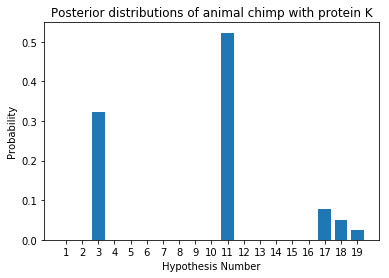

In [27]:
# load the data
data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

fig, axis = plt.subplots()
plot_prob_clusters_have_k(axis, hyps, prior, 'chimp', animal_names)

In [28]:
"""Is plot_prob_clusters_have_k implemented correctly?"""
from nose.tools import assert_not_equal
from numpy.testing import assert_array_equal

# load the data
data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

# make sure it calls prob_clusters_have_k
fig, axis = plt.subplots()
old_prob_clusters_have_k = prob_clusters_have_k
del prob_clusters_have_k
try:
    plot_prob_clusters_have_k(axis, hyps, prior, 'chimp', animal_names)
except NameError:
    pass
else:
    raise AssertionError("plot_prob_clusters_have_k does not call prob_clusters_have_k")
finally:
    prob_clusters_have_k = old_prob_clusters_have_k
    del old_prob_clusters_have_k
plt.close()

for i, name in enumerate(animal_names):
    fig, axis = plt.subplots()
    
    # create the plot
    plot_prob_clusters_have_k(axis, hyps, prior, name, animal_names)
    
    # check y-data
    actual = np.array([p.get_height() for p in axis.patches])
    expected = prob_clusters_have_k(hyps, prior, i)
    assert_array_equal(actual, expected)

    # check x-data
    actual = np.array([p.get_x() for p in axis.patches])
    expected = np.arange(1, len(hyps) + 1) - 0.4
    assert_array_equal(actual, expected)

    # check the axis labels
    assert_not_equal(axis.get_xlabel(), "")
    assert_not_equal(axis.get_ylabel(), "")
    
    # check the title
    assert name in axis.get_title(), "the animal name is not in the title of the plot"
    
    plt.close()
    
print("Success!")

Success!


---
## Part C (1 point)

The probability that another animal $Y$ has blood that contains
protein K can be computed by averaging over the set of hypotheses,
using the posterior distribution. That is, the probability that animal
$Y$ is in the set $C$ of animals that have blood containing protein K
is

\begin{equation}
p(Y \in C\ |\ d) = \sum_h p(Y \in C\ |\ h) p(h\ |\ d)
\end{equation}

where $p(Y \in C\ |\ h) = 1$ if the animal $Y$ is in hypothesis $h$, and
$0$ otherwise.

<div class="alert alert-success">
Compute the probability that each of the nine other animals has blood that contains protein K.
</div>

In [29]:
def prob_animals_have_k(hyps, prior, animal_idx):
    """Returns the posterior probabiltiy of each animal having protein
    K given that the given animal is observed to have protein K. You should
    call prob_clusters_have_k as part of your solution.
    
    Parameters
    ----------
    hyps: a Numpy array with 2 dimensions
        The hypotheses from the animal data set explored above.
    prior: a Numpy array
        Prior probabilities for each hypothesis.
    animal_idx : integer
        The index of the animal observed to have protein K.
        
    Returns
    -------
    An array with one entry per animal containing its posterior probability
    of having protein K.
    
    """
    # YOUR CODE HERE
    posteriors = prob_clusters_have_k(hyps, prior, animal_idx)
    lst = []
    for n in range(0,len(list(animal_names))):
        summ = 0
        x = 0
        while x < len(hyps):
            if hyps[x][n] == 1:
                summ += posteriors[x]
            x = x+1
        lst.append(summ)
    return np.array(lst)

Again, assuming we've observed a chimp with protein K, what is the probability that each of the other animals has it?

In [30]:
# load the data
data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

prob_animals_have_k(hyps, prior, animal_names.index('chimp'))

array([ 0.15352697,  0.15352697,  1.        ,  0.67634855,  0.0746888 ,
        0.0746888 ,  0.02489627,  0.02489627,  0.15352697,  0.15352697])

In [31]:
"Check that prob_animals_have_k is correct"

from numpy.testing import assert_allclose

expected1 = np.array([
    1.        ,  0.58452138,  0.15071283,  0.15071283,  0.07331976,
    0.07331976,  0.02443992,  0.02443992,  0.30346232,  0.30346232])
actual1 = prob_animals_have_k(hyps, prior, 0)
assert_allclose(actual1, expected1)

expected2 = np.array([
    0.22008863,  0.22008863,  0.10930576,  0.10930576,  0.05317578,
    0.05317578,  0.01772526,  0.01772526,  1.        ,  0.68094535])
actual2 = prob_animals_have_k(hyps, prior, 8)
assert_allclose(actual2, expected2)

expected3 = np.array([
    0.22008863,  0.22008863,  0.10930576,  0.10930576,  0.05317578,
    0.05317578,  0.01772526,  0.01772526,  0.68094535,  1.        ])
actual3 = prob_animals_have_k(hyps, prior, 9)
assert_allclose(actual3, expected3)

# make sure it calls prob_clusters_have_k
fig, axis = plt.subplots()
old_prob_clusters_have_k = prob_clusters_have_k
del prob_clusters_have_k
try:
    prob_animals_have_k(hyps, prior, 9)
except NameError:
    pass
else:
    raise AssertionError("prob_animals_have_k does not call prob_clusters_have_k")
finally:
    prob_clusters_have_k = old_prob_clusters_have_k
    del old_prob_clusters_have_k
plt.close()

print("Success!")

Success!


# Part D (0.5 points)

<div class="alert alert-success">
As before, let's visualize these probabilities with a bar graph. Create a bar plot (using `axis.bar`) of the posterior probability of each animal having protein K given that an observed animal has protein K.
</div>

In [32]:
def plot_prob_animals_have_k(axis, hyps, prior, name, animal_names):
    """Plots the posterior probabiltiy of each animal having
    protein K given that a given animal is observed to have 
    protein K. Your function should call prob_animals_have_k.
        
    * Your function should call prob_animals_have_k.
    * You should give your plot an informative title that includes the
      name of the observed animal.
    * Set the xticks to be a range of integers from 0 to the number of
      animal names.
    * Set the xtick labels (with `axis.set_xticklabels`) to be the animal
      names. You will probably want to use a rotation of -90 degrees so
      that the names are legible. To see how to achieve this, check the
      documentation for `axis.set_xticklabels`
    * Be sure to include proper axis labels!
    * Align your bars using the align='center' keyword argument to 
      `axis.bar`
    
    Parameters
    ----------
    hyps: a Numpy array with 2 dimensions
        The hypotheses from the animal data set explored above.
    prior: a Numpy array
        Prior probabilities for each hypothesis.
    name : string
        The name of the animal observed to have protein K.
    animal_names : list of strings
        A list of all animal names
    
    """
    # YOUR CODE HERE
    axis.set_title("Posterior probability of " + name + " has protein K, given observation")
    axis.set_xticks([h for h in range(0, len(list(animal_names)))])
    axis.set_xlabel("Hypothesis Number")
    axis.set_ylabel("Animal")
    axis.set_xticklabels([a for a in list(animal_names)], rotation = -90)
    axis.bar([h for h in range(0, len(list(animal_names)))], 
             [p for p in prob_animals_have_k(hyps, prior, animal_names.index(name))], align='center')

Now let's try it out, again assuming we've observed that a chimp has protein K:

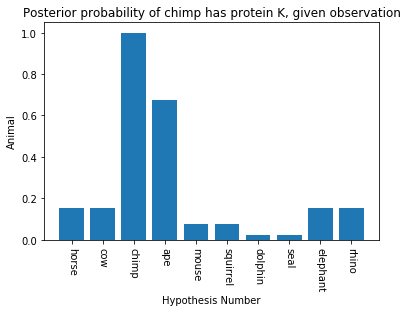

In [33]:
# load the data
data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

fig, axis = plt.subplots()
plot_prob_animals_have_k(axis, hyps, prior, 'chimp', animal_names)

In [34]:
"""Is plot_prob_animals_have_k implemented correctly?"""
from nose.tools import assert_not_equal, assert_equal
from numpy.testing import assert_array_equal

# load the data
data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

# make sure it calls prob_clusters_have_k
fig, axis = plt.subplots()
old_prob_animals_have_k = prob_animals_have_k
del prob_animals_have_k
try:
    plot_prob_animals_have_k(axis, hyps, prior, 'chimp', animal_names)
except NameError:
    pass
else:
    raise AssertionError("plot_prob_animals_have_k does not call prob_animals_have_k")
finally:
    prob_animals_have_k = old_prob_animals_have_k
    del old_prob_animals_have_k
plt.close()

for i, name in enumerate(animal_names):
    fig, axis = plt.subplots()
    
    # create the plot
    plot_prob_animals_have_k(axis, hyps, prior, name, animal_names)
    
    # check y-data
    actual = np.array([p.get_height() for p in axis.patches])
    expected = prob_animals_have_k(hyps, prior, i)
    assert_array_equal(actual, expected)

    # check x-data
    actual = np.array([p.get_x() for p in axis.patches])
    expected = np.arange(len(animal_names)) - 0.4
    assert_array_equal(actual, expected)

    # check the axis labels
    assert_not_equal(axis.get_xlabel(), "")
    assert_not_equal(axis.get_ylabel(), "")
    
    # check xticks
    assert_array_equal(axis.get_xticks(), np.arange(len(animal_names)))
    assert_array_equal([x.get_text() for x in axis.get_xticklabels()], animal_names)
    
    # check the title
    assert name in axis.get_title(), "the animal name is not in the title of the plot"
    
    plt.close()
    
print("Success!")

Success!


---
## Part E (0.75 points)

<div class="alert alert-success">
Find a willing experimental participant who is not in this class. Tell them that, in the context of this experiment, scientists recently discovered that the blood of chimps contains protein K. Then, for all ten animals, ask them to rate how likely it is that each animal has blood containing protein K, using a scale from 1 to 7. On this scale, 7 indicates that the animal definitely DOES have blood containing protein K, 1 indicates that it definitely DOES NOT have blood containing protein K, and 4 indicates an even bet. Note that chimps are index 2.
</div>

The ratings you collect should be in the same order as the list of animal names:

In [35]:
data = np.load("data/animals.npz")
list(data['names'])

['horse',
 'cow',
 'chimp',
 'ape',
 'mouse',
 'squirrel',
 'dolphin',
 'seal',
 'elephant',
 'rhino']

In [36]:
def participant_ratings_chimps():
    """Participant ratings of how likely each animal is to have
    protein K after observing that a chimp has protein K, on
    a scale from 1 (least likely) to 7 (most likely).
    
    Parameters
    ----------
    None.
        
    Returns
    -------
    A numpy array of participant ratings, one for each animal.
    
    """
    # YOUR CODE HERE
    return [2, 2, 7, 6, 2, 2, 2, 1, 1, 2]

In [37]:
"""Is participant_ratings_chimp in the proper format?"""

data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

ratings = participant_ratings_chimps()

# Make sure that there are 10 ratings.
assert(len(ratings) == 10)

# Make sure that the ratings are between 1 and 7.
assert(all([r <= 7 for r in ratings]))
assert(all([r >= 1 for r in ratings]))

if not any([r == 7 for r in ratings]):
    print("Mild warning: isn't it surprising that no ratings are 7?")

print("Success!")

Success!


Now let's visualize the results and compare them to our model's predictions:

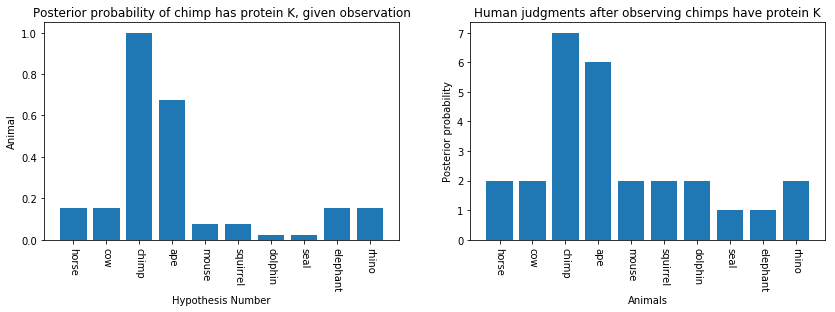

In [38]:
# get the human data
human = participant_ratings_chimps()

# load the model data
data = np.load("data/animals.npz")
hyps = data['hyps']
prior = data['prior']
animal_names = list(data['names'])

fig, (axis1, axis2) = plt.subplots(1, 2)

# plot the model probabilities
plot_prob_animals_have_k(axis1, hyps, prior, 'chimp', animal_names)

# plot the human judgments
axis2.bar(np.arange(hyps.shape[1]), human, align='center')
axis2.set_xlabel('Animals')
axis2.set_ylabel('Posterior probability')
axis2.set_title('Human judgments after observing chimps have protein K')
axis2.set_xticks(np.arange(hyps.shape[1]))
axis2.set_xticklabels(animal_names, rotation=-90)

# make the figure size nicer
fig.set_figwidth(14)

---
## Part F (1.25 points)

Now let's compare your experimental results with the predictions of the Bayesian generalization model by computing the correlation between them. The correlation coefficient
is a score indicating the degree of correspondence, ranging from -1 to 1, where 1 means that
the model and predictions are perfectly correlated, 0 means that they are unrelated, and -1
means that they are anti-correlated (the higher the model's rating, the lower the human's rating).

In [39]:
model = prob_animals_have_k(hyps, prior, 2)
human = participant_ratings_chimps()

correlation = np.corrcoef(model, human)[0, 1]
print("Correlation between model and human: " + str(correlation))

Correlation between model and human: 0.964334726302


<div class="alert alert-success">
What is the correlation?  Based on looking at your plots from parts D
and E, are there any systematic differences between your participant's
judgments and the model predictions?
</div>

The correlation is 0.964. Both graphs look very similar, the only difference is that the animals rated by the human are systematically higher because they could only rate the similarity between 1-7, not 0-7. Another difference is in the human judgement, the ape is much more similar to the chimp than the model predictions. Other than this, both the model predictions and human judgement are very similar.

---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [40]:
print("No errors!")

No errors!
